In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
%matplotlib inline
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [302]:
f0=16490

In [303]:
f=np.array([.3*f0,.5*f0,.7*f0,.9*f0,f0,3*f0,5*f0,7*f0,9*f0])
ferr=np.array([.005,.005,.005,.005,.005,.005,.005,.005,.005])
#ferr=np.std(f)

In [304]:
v1=np.array([0.67,0.64,0.57,0.35,.3,.66,.67,.67,.68])
#v1err=np.array([.005,.005,.005,.005,.005,.005,.005,.005,.005])
v1err=np.std(v1)

In [305]:
v2=np.array([0.032,.046,.066,.095,.105,.034,.026,.023,.021])
#v2err=np.array([5e-4,5e-4,5e-4,5e-4,5e-4,5e-4,5e-4,5e-4,5e-4])
v2err=np.std(v2)

In [306]:
dT=np.array([.16e-3,.95e-4,.68e-4,.59e-4,.1e-5,-6e-6,-4e-6,-2e-6,-2e-6])
#dTerr=np.array([5e-7,5e-8,5e-8,5e-8,5e-9,5e-10,5e-10,5e-10,5e-10])
dTerr=np.std(dT)

In [307]:
def lmf(v1,v2):
    #yellow= v1 or input, blue=outpu or v2
    return 20*np.log10(v2/v1)

In [308]:
def lmferr(v1,v1er,v2,v2er):
    return np.sqrt(((20/(np.log(10)*v1))**2)*(v1er**2)+((20/(np.log(10)*v2))**2)*(v2er**2))
                   
                   

In [309]:
def h(f,T):
    return 360*f*T

In [310]:
def her(f,fer,T,Ter):
    return np.sqrt(((360*T)**2)*((fer)**2)+((360*f)**2)*((Ter)**2))

In [311]:
i=0
lm1=np.array([])
while np.size(v1)>i:
    lm1=np.append(lm1,[lmf(v1[i],v2[i])])
    i=i+1
        

In [312]:
print(lm1)

[-26.41849649 -22.86844285 -18.7266184  -11.32688878  -9.11863911
 -25.76130037 -28.22202909 -29.28693933 -30.20579236]


In [313]:
x=0
lm1er=np.array([])
while np.size(v1)>x:
    lm1er=np.append(lm1er,[lmferr(v1[x],v1err,v2[x],v2err)])
    x+=1
        

In [314]:
print(lm1er)

[ 8.31626618  5.95623834  4.47434535  4.41557966  4.7416046   7.85734592
 10.15256466 11.43702491 12.49627408]


In [315]:
j=0
Hd=np.array([])
while np.size(dT)>j:
    Hd=np.append(Hd,[h(f[j],dT[j])])
    j=j+1

In [316]:
y=0
Hder=np.array([])
while np.size(dT)>y:
    Hder=np.append(Hder,[her(f[y],ferr[y],dT[y],dTerr)])
    y=y+1

In [327]:
Hder=np.array([12.34169922 , 20.5694987 ,  28.79729817  ,37.02509765 , 41.13899739,
 12.341699218 ,20.569498696 ,28.797298174 ,37.025097652])


In [328]:
print(Hd)

[ 284.9472   281.979    282.57264  315.22284    5.9364  -106.8552
 -118.728    -83.1096  -106.8552 ]


In [486]:
print(Hder)

[12.34169922 20.5694987  28.79729817 37.02509765 41.13899739 12.34169922
 20.5694987  28.79729817 37.02509765]


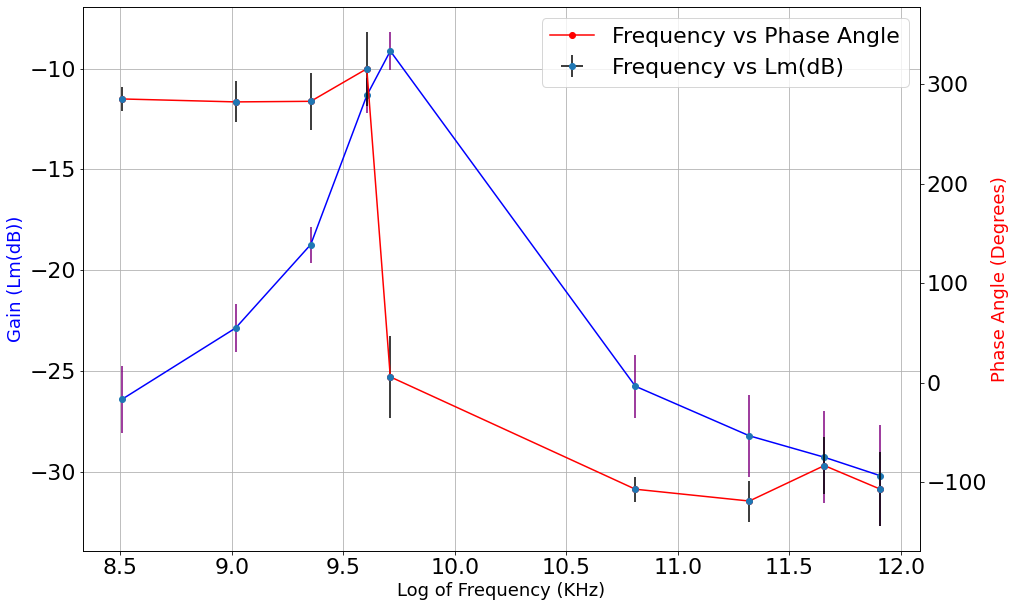

In [489]:

fig,ax = plt.subplots()
plt.grid(True)
# make a plot
ax.plot(np.log(f),lm1, color="b")
ax.errorbar(np.log(f), lm1, xerr = ferr,yerr=lm1er/5,ecolor="purple",fmt='o' )
# set x-axis label
ax.set_xlabel("Log of Frequency (KHz)",fontsize=18)
# set y-axis label
ax.set_ylabel("Gain (Lm(dB))",color="blue",fontsize=18)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.log(f),Hd,color='red', marker="o")
ax2.errorbar(np.log(f), Hd, xerr = ferr,yerr = (Hder), ecolor="black",fmt='o')
ax2.set_ylabel("Phase Angle (Degrees)",color="red",fontsize=18)
plt.legend(['Frequency vs Phase Angle','Frequency vs Lm(dB)'])
plt.show()


In [ ]:
#Now to plot Current vs w 

In [454]:
Cu5=np.array([.006,.007,.01,.016,.027,.046,.063,.079,.093,.08,.063,.046,
            .028,.016,.009,.006,.004,.004])

Cu30=np.array([.005,.006,.006,.006,.008,.01,.012,.015,.017,0.015,.013,
             .01,.008,.006,.005,.005,.004,.004])

cap=np.array([30e-9,40e-9,50e-9,60e-9,70e-9,80e-9,90e-9,100e-9,110e-9,
              120e-9,130e-9,140e-9,150e-9,160e-9,170e-9,180e-9,190e-9,200e-9])


In [455]:
cu5err=np.std(Cu5)/5
cu30err=np.std(Cu30)

In [479]:
d=0
werr=np.array([])
while np.size(cap)>d:
    werr=np.append(werr,np.sqrt(((cap[d]/(2*(cap[d]*.932e-3)**(3/2)))**2)*(.5e-3)**2))
    d+=1
    
    

In [476]:
def w0(L,C):
    return 1/(np.sqrt(L*C))

In [477]:
k=0
w=np.array([])
while np.size(cap)>k:
    w=np.append(w,[w0((.932e-3),cap[k])])
    k+=1

In [487]:
print(w)

[189117.36861806 163780.4455201  146489.68382726 133726.17378999
 123806.37956045 115810.26365302 109186.96368007 103583.84880813
  98763.32468862  94558.68430903  90849.04526786  87544.33054135
  84575.85839117  81890.22276005  79445.1854459   77206.84243535
  75147.62220528  73244.84191363]


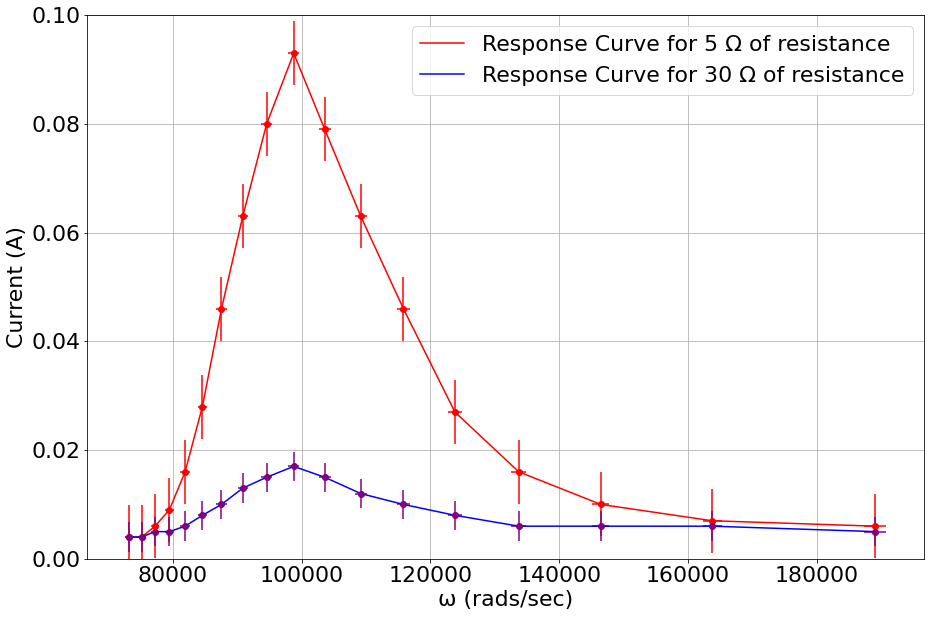

In [485]:
plt.plot(w,C5,color='red')
plt.xlabel('\u03C9 (rads/sec)')
plt.ylabel('Current (A)')
plt.errorbar(w,C5,xerr=werr/30,yerr=cu5err, fmt='o',color='red')
plt.plot(w,C30,color='blue')
plt.errorbar(w,C30,xerr=werr/30,yerr=cu30err*2/3, fmt='o',color='purple')
plt.legend(['Response Curve for 5 \u03A9 of resistance', 
            'Response Curve for 30 \u03A9 of resistance'])
plt.ylim(0,.1)
plt.grid(True)



In [465]:
#The resonant frewuency in the data
print(w[8])

98763.3246886238
